**Цель:** данное исследование предполагает построение модели для решения задачи  классфикации выживших/не выживших пассажиров парахода "Титаник", в зависимости от их индивидуальных особенностей

**Данные:** https://www.kaggle.com/competitions/titanic/overview

**Стадии решения задачи:**
*   Загрузка данных
*   Разведочный анализ (EDA)
*   Предварительная обработка данных (Preprocessing)
*   Обучение моделей и прогнозирование класса на основе тестовой выборки
*   Вывод



#**Загрузка данных**



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set_theme(style='darkgrid')

In [ ]:
#Прочитаем наш датасет
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
survived_test = pd.read_csv('/content/gender_submission.csv')

Признаки:
*   Pclass: класс билета 1='1-ый', 2='2-ой', 3='3-ий'
*   Name: ФИО пассажира
*   Sex: пол пассажира
*   Age: возраст пассажира
*   SibSp: количество братьев и сестер/супругов на борту "Титаник"
*   Parch: количество родителей/детей на борту "Титаник"
*   Ticket: номер билета  
*   Fare: стоимость проезда для пассажиров
*   Cabin: номер каюты
*   Embarked: город посадки C='Шербур', Q='Квинстаун', S='Саутгемптон'

Целевой признак:
*   Survived: выжил 1='Да', 0='Нет'





In [ ]:
survived_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Присоеденияем столбец Survived к df_test, чтобы
#проанализировать датасеты целиком в дальнейшем
df_test.insert(1,'Survived',survived_test['Survived'],True)
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Объединяем датасеты
df = pd.merge(df_train,df_test, how='outer')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Разведочный анализ (EDA)**







**Задачи:**
*   Детальное изучение данных: количество пропущенных данных, типы данных
*   Изучение корелляции между признаками
*   Изучение статистики распределения значений признаков, поиск выбросов
*   Просмотр сбалансированости классов классификации
*   Числовой и графический анализ

In [ ]:
df[df.duplicated()].head()
#Нету дублирующихся строчек

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


(1309, 12)

In [ ]:
#Посмотрим процент пропущенных значений по признаку
for col in df.columns:
  print(f'{col}: {df[col].isna().sum()/ df.shape[0]*100:.2f}%')

PassengerId: 0.00%
Survived: 0.00%
Pclass: 0.00%
Name: 0.00%
Sex: 0.00%
Age: 20.09%
SibSp: 0.00%
Parch: 0.00%
Ticket: 0.00%
Fare: 0.08%
Cabin: 77.46%
Embarked: 0.15%


In [ ]:
#Посмотрим распределение категориальных признаков
fig = px.pie(df,names='Embarked',template='seaborn')
fig.show()

In [ ]:
fig = px.pie(df,names='Sex',template='seaborn')
fig.show()

In [ ]:
#Если дисбаланс между классами был больше,то
#при обучении модели можно было бы попробовать технику переcэмплирования
#синтетического меньшинства (SMOTE) для балансировки классов
fig = px.pie(df,names='Survived',template='seaborn')
fig.show()

In [ ]:
fig = px.pie(df,names='Pclass',template='seaborn')
fig.show()

In [ ]:
numeric_columns = ['Pclass','Age','SibSp','Parch','Fare']

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

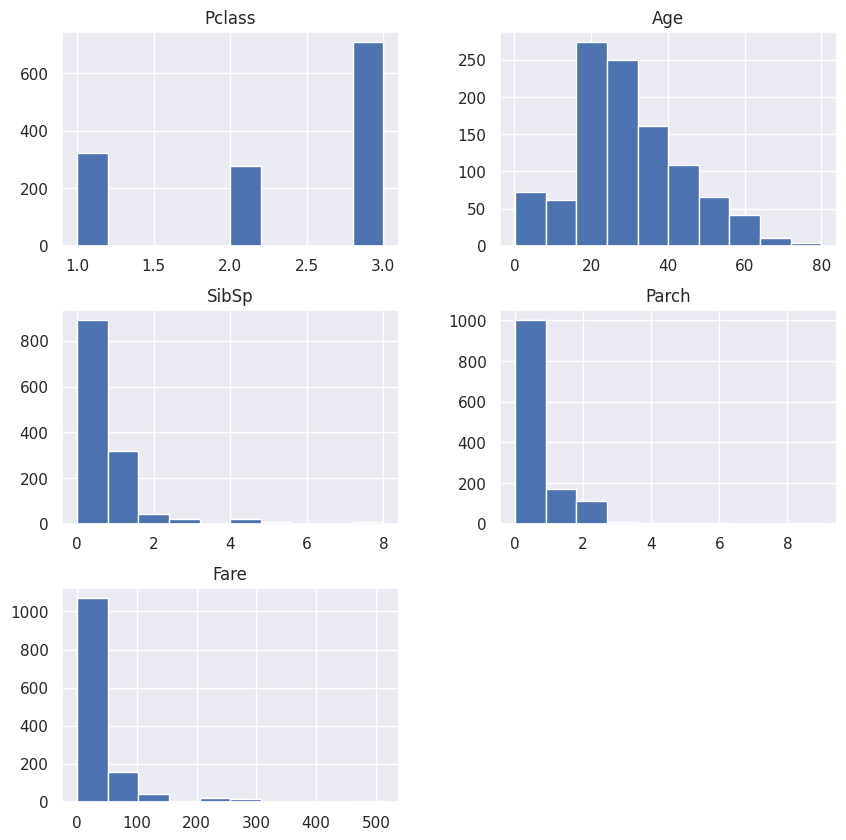

In [ ]:
#Гистограммы количественных признаков
df[numeric_columns].hist(figsize=(10,10))

<ipython-input-18-91909cf9a9ce>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

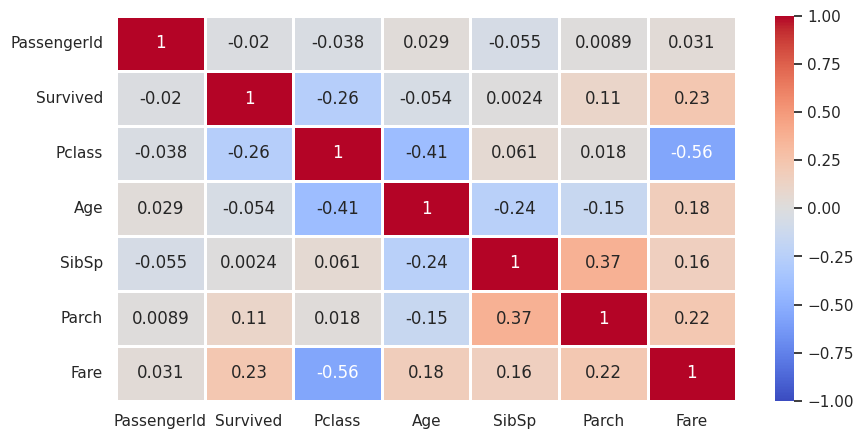

In [ ]:
#Корелляционная матрица количественных признаков
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(),annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white',)

<Axes: >

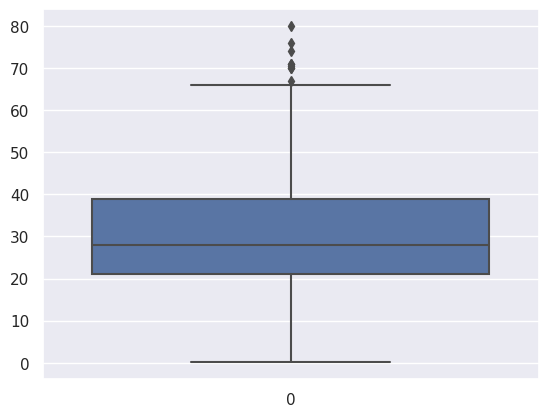

In [ ]:
sns.boxplot(df['Age'])

<Axes: >

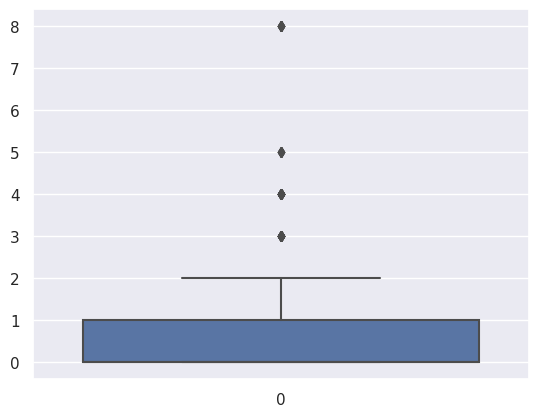

In [ ]:
sns.boxplot(df['SibSp'])

<Axes: >

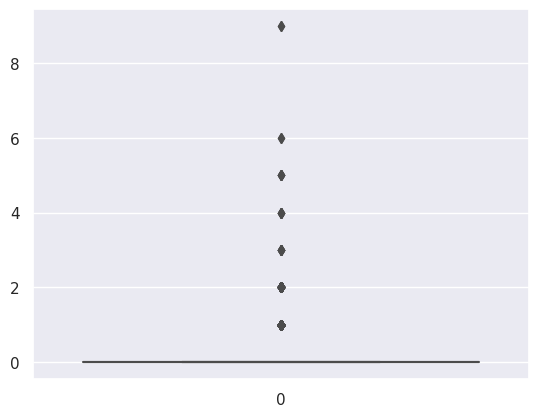

In [ ]:
sns.boxplot(df['Parch'])

<Axes: >

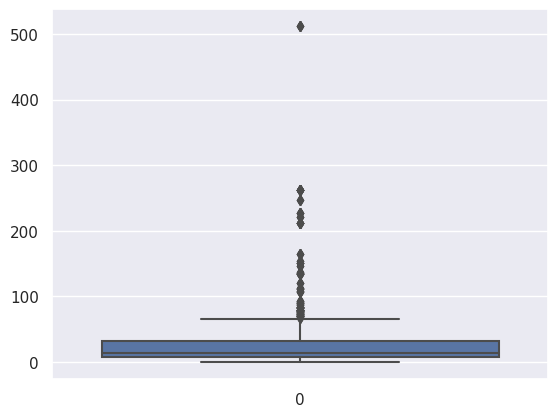

In [ ]:
#На графике видно высокое количество выбросов
#Следует поподробнее изучасть данные о стоимости билета
sns.boxplot(df['Fare'])

In [ ]:
#У признака 'Fare' присуствует слабая, но довольно существенная
# на фоне остальных признаков корелляция с 'Pclass'.
#Рассмотрим это подробнее
fig = px.box(df,y='Fare',x='Pclass',template='seaborn')
fig.show()
#Было понятно, что стоимость билета в 1-ом классе дороже, но
#теперь это наглядно продемонстрировано. Также стоит учесть,
#что количество пассажиров 3-го класса - большинство(54%),
#поэтому такое большое количество выбросов на boxplote признака 'Fare'

In [ ]:
fig = px.box(df,y='Fare',x='Pclass',color='Parch',template='seaborn')
fig.show()
#Также видно, что стоимость билетов напрямую зависит и
#от количества проживающих в каюте. Это также можно было
#увидеть, проанализироваав матрицу корелляции

In [ ]:
#Процент пропусков в признаке 'Fare' всего 0,08% ,
#но проанализировав графики можно заметить, что стоимость некоторых
#билетов =0. Поездка вряд ли могла быть бесплатной, поэтому...
df.loc[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
#... заменим бесплатные значения на пропуски, которые заполним в дальнейшем
df['Fare'].replace(0,np.nan,inplace=True)

<Axes: xlabel='Survived', ylabel='Age'>

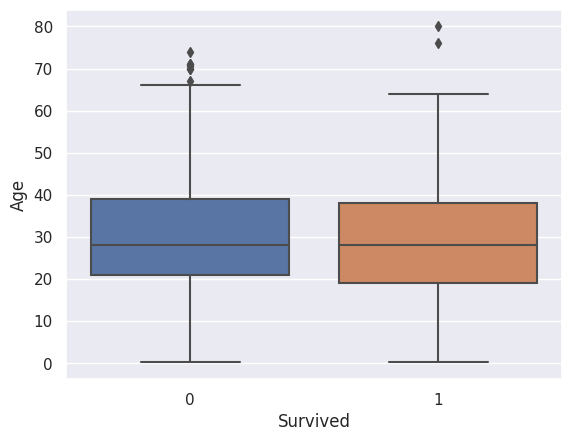

In [ ]:
#Теперь следует подробнее изучить признаки с пропущенными значениями

sns.boxplot(data=df, x='Survived', y='Age')
#График говорит о том, что возраст выживших и погибших
#приблизтельно одинаковый и может показаться, что этот признак не значим.
#Но мы знаем, что при эвакуации первых спасают детей и женщин,
#поэтому возраст пассажиров - важный признок.
#В дальнейшем эту гипотезу также можно будет проверить, посмотрев
#на веса признаков при построение модели.

In [ ]:
#А сейчас распределим людей на возрастные группы и попытаемя проверить
#это сами, визуазировав распределение выживших и погибшим по возрастным группам
def age_type(age):
    if age < 15:
        return 'child'
    elif age < 50:
        return 'middle-aged'
    else:
        return 'old'
df['Age type'] = df['Age'].apply(age_type)

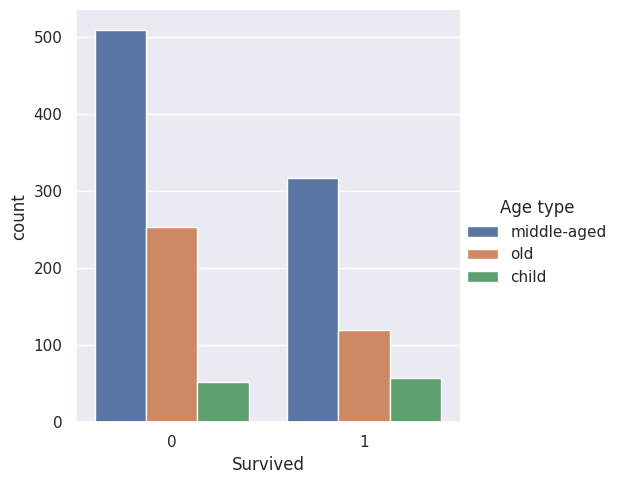

In [ ]:
sns.catplot(df, x='Survived', hue='Age type', kind='count')
#Можно заметить, что только в группе 'child' соотношение
#погибших и выживших примерно равно, это подтверждает нашу гипотезу
#о том, что в первую очередь эвакуируют детей.

<Axes: xlabel='Survived', ylabel='Age'>

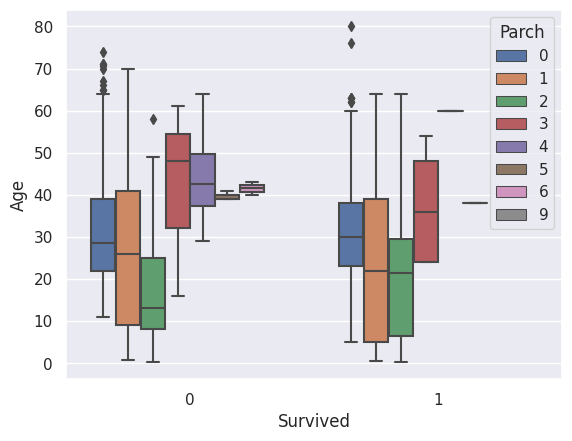

In [ ]:
#Проанализировав матрицу корелляций, можно заметить
#что признак 'Age' имеет зависимость с признаками
#'SibSp' и 'Parch'. Следует рассмотреть это подробнее,
#чтобы в дальнейшем эффективнее заполнить пропуски в данных
sns.boxplot(data=df, x='Survived', y='Age',hue='Parch')
#Как и следовало ожидать, средний возраст выше у людей с
#наибольшим количеством родителей/детей; и ниже у противиположных

<Axes: xlabel='Survived', ylabel='Age'>

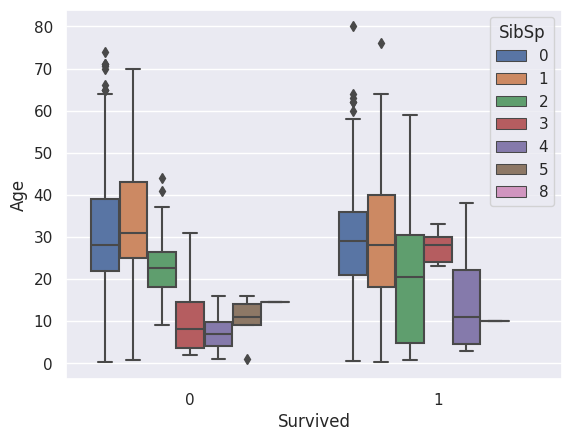

In [ ]:
sns.boxplot(data=df, x='Survived', y='Age',hue='SibSp')
#У людей с наибольшим количеством супругов/братьев и сестер
#средний возраст ниже, чем у остальных. Эти данные помогут
#нам при заполнение пропущенных значений

In [ ]:
#Изучим подробнее признак 'Embarked'
fig = px.histogram(df,x='Survived',color='Embarked',barmode='group',histfunc='sum',template='seaborn')
fig.show()
#Можно заметить, что соотношение погибших и выживших
#отличается в зависимости от города посадки на судно.
#Почему % выживших пассажиров,севших на "Титаник" в городах 'C'
#и 'Q', больше, чем севших в городе 'S'.
#Давайте посмотрим с чем это может быть связано

In [ ]:
fig = px.histogram(df,x='Embarked',color='Pclass',barmode='group',histfunc='sum',template='seaborn')
fig.show()
#Сильно выделяется то, что в городе 'C' на пароход
#село большое количество пассажиров первого класса
#по сравнению с остальными классами. Посмотрим
#влияет ли уровень класса на выживаемость

In [ ]:
fig = px.histogram(df,x='Survived',color='Pclass',barmode='group',histfunc='sum',template='seaborn')
fig.show()
#Да, только пассажиров первого класса больше
#спаслось, чем погибло. Поэтому так много выживших
#из города 'C'.
#Это и объясняет, почему больше всего погибших из
#города 'S': в нем село наибольшее количество людей и
#наибольшая часть из них пассажиры третьего класса.
#Но что же с городом 'Q', в нем село наименьшее
#количество людей, при этом большая часть из них -
#это пассажиры третьего класса. Так почему же соотношение
#выживших и погибших, севших в этом городе, практически одинаково?

In [ ]:
fig = px.histogram(df,x='Embarked',color='Age type',barmode='group',histfunc='sum',template='seaborn')
fig.show()
#Посмотрим на количество детей в каждом классе и поймем,
#что это тут не при чем.
#Видимо нельзя понять почему именно такой высокий %
#выживших из города 'C' из-за недостатка данных. Возможно
#их каюты ближе находились к спасательным шпюпкам.

In [ ]:
#Посмотрим,можно ли как-то заполнить пропуски в
#признаке 'Сabin'
df['Cabin'].nunique()
#Так как там очень много уникальных значений, то добавим
#новую колонку, которая будет содержать тип кабины

186

In [ ]:
df['Type of cabin'] = df['Cabin'].str[0]
df['Type of cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Type of cabin, dtype: int64

In [ ]:
fig = px.histogram(df,x='Survived',color='Type of cabin',barmode='group',histfunc='sum',template='seaborn')
fig.show()
#Сразу заметна проблема с большим количеством пропусков, обычно
#количество выживших по признаку меньше количества погибших, но
#тут все наоборот.

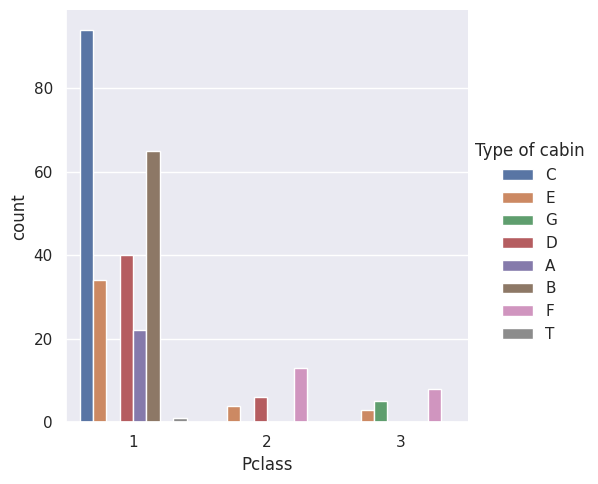

In [ ]:
#Давайте проверим, есть ли зависимость между типом кабины и классом билета
sns.catplot(df,x='Pclass',kind='count', hue='Type of cabin')
#Видно, чо только у пасажиров 2-го и 3-го класса есть кабины типа 'F', но
#об этом нельзя утверждать из-за высокого процентра пропущенных значений, также
#как и об остальных типах.
#Становиться очевидно, что признак с таким высокиим процентом пропусков
#лучше удалить.

Выводы:
*   Данные были изучены и визуализированы
*   Выявлены закономерности между признаками
*   Задачи разведочного анализа были выолнены, можно переходить к предварительной обработке данных



#**Предварительная обработка данных(Preprocessing)**





**Задачи:**
*   Преобразование типов данных:преобразование категориальных признаков,One Hot encoding
*   Удаление выбросов
*   Заполнение пропусков
*   Нормализация (масштабирование) числовых признаков
*   Исключение признаков

In [ ]:
df = df.drop(['Type of cabin','Cabin','PassengerId','Name','Ticket','Age type'],axis=1)
#исключение ненужных признаков

In [ ]:
#Начнем с заполнения пропусков.
#Заполненим пропуски в признаке 'Fare' с
#помощью наиболее распостраненного значения признака
df['Embarked'] = df['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])

In [ ]:
#Заполним пропуски и нулевые значения признака 'Fare'.
#Для начала получим среднее значение стоимости билета по его классу
df.groupby('Pclass')['Fare'].median()

Pclass
1    61.3792
2    15.0500
3     8.0500
Name: Fare, dtype: float64

In [ ]:
fare_by_pclass = df.groupby('Pclass')['Fare'].transform('median')
fare_by_pclass

0        8.0500
1       61.3792
2        8.0500
3       61.3792
4        8.0500
         ...   
1304     8.0500
1305    61.3792
1306     8.0500
1307     8.0500
1308     8.0500
Name: Fare, Length: 1309, dtype: float64

In [ ]:
#Заполним пропущенные
df['Fare'] = df['Fare'].fillna(fare_by_pclass)

In [ ]:
#Аналогично с признаком 'Age'
df.groupby('Parch')['Age'].median()

Parch
0    29.0
1    22.5
2    17.0
3    42.0
4    45.0
5    39.0
6    41.5
9     NaN
Name: Age, dtype: float64

In [ ]:
df.groupby('SibSp')['Age'].median()

SibSp
0    28.0
1    30.0
2    21.5
3    14.5
4     7.0
5    10.5
8    14.5
Name: Age, dtype: float64

In [ ]:
df.groupby(['SibSp','Parch'])['Age'].median()

SibSp  Parch
0      0        29.0
       1        25.0
       2        24.0
       3        30.0
       4        29.0
       5        40.0
1      0        30.0
       1        27.0
       2        24.0
       3        48.0
       4        52.5
       5        39.0
       6        41.5
       9         NaN
2      0        25.0
       1         5.0
       2        18.0
       3        24.0
3      0        31.0
       1         6.0
       2        14.5
4      1         7.0
       2         7.5
5      2        10.5
8      2        14.5
Name: Age, dtype: float64

In [ ]:
age_by_relatives = df.groupby(['SibSp','Parch'])['Age'].transform('median')
age_by_relatives

0       30.0
1       30.0
2       29.0
3       30.0
4       29.0
        ... 
1304    29.0
1305    29.0
1306    29.0
1307    29.0
1308    27.0
Name: Age, Length: 1309, dtype: float64

In [ ]:
df['Age'] = df['Age'].fillna(age_by_relatives)
df.info()
# 2 незаполненных значений, т.к нет среднего значения возраста
#для Parch=9

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1307 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 124.3+ KB


In [ ]:
#Посмотрим
df.loc[df['Parch']==9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1233,0,3,male,NaN,1,9,69.55,S
1256,1,3,female,NaN,1,9,69.55,S


In [ ]:
#Можно сделать вывод, что это супружеская пара с 9-ю
#детьми. Посмотрев на похожие ситуации в сводной таблице
#подставим, в значение признака возраст равный 40 годам.
df.loc[(df['Parch']==9) &  (df['Age'].isna()), 'Age'] = 40
df['Age'][df['Parch']==9]

1233    40.0
1256    40.0
Name: Age, dtype: float64

In [ ]:
df.info()
#Закончили с заполнением пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 124.3+ KB


In [ ]:
#Преобразуем категориальные признаки
df['Sex'].replace({'female': 0 ,'male': 1},inplace=True )
df['Sex'] = df['Sex'].astype('int64')
df['Sex'].dtype

dtype('int64')

In [ ]:
# One Hot encoding

# encoder=OneHotEncoder(handle_unknown='ignore')
# encoder_df=pd.DataFrame(encoder.fit_transform(df[['Embarked']]).toarray())
# df=df.join(encoder_df)
# df=df.drop('Embarked',axis=1)
# df=df.rename(columns={0:'C',1:'Q',2:'S'})
# df.head()


In [ ]:
df = pd.get_dummies(df,columns=['Embarked'])
df[['Embarked_C','Embarked_Q','Embarked_S']] = df[['Embarked_C','Embarked_Q','Embarked_S']].astype('int64')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
#Масшатибрование данных

#Некоторые модели, как KNN чувствительны к масшатабам данных,
#а некоторые, как модели основанные на дереве решений, - нет.
#LASSO и Ridge также накладывают штраф на величину коэффициентов,
#связанных с каждой переменной. При этом масштаб переменных
#влияет на то, какой штраф будет наложен на их коэффиценты.
# Поэтому нам следует масштабировать данные.
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,0.644003,29.523812,0.498854,0.385027,33.698007,0.206264,0.093965,0.699771
std,0.484918,0.837836,0.478997,13.026392,1.041658,0.865560,51.677126,0.404777,0.291891,0.458533
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,3.170800,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.500000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.387500,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
#Для начала разделим нашу выборку, на test и train
x = df.drop(['Survived'],axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [ ]:
#С учетом распределения части признаков от 0 до 1,
#нам подойдет масштабирование методом MinMaxScaler, чтобы значения
#преобразованнх признаков также были в диапозоне от 0 до 1
mms=MinMaxScaler()
columns_to_scale = ['Pclass','Age','Parch','Fare','SibSp']
mms.fit(x_train[columns_to_scale])
x_train[columns_to_scale] = mms.transform(x_train[columns_to_scale])
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,0.640879,0.644699,0.370183,0.062082,0.041706,0.062398,0.211079,0.091691,0.697230
std,0.422786,0.478833,0.166803,0.131394,0.097866,0.106625,0.408270,0.288727,0.459676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.273456,0.000000,0.000000,0.009337,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.361142,0.000000,0.000000,0.022251,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.448829,0.125000,0.000000,0.059076,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])
x_test.describe()
#При этом на test мы где-то не получили чистый диапозон от 0 до 1.
#Это нормально, так как мы используем min и max с обучения. Наша цель -
#это перевести данные в такую же шкалу, что получили на train

#На этом preprocessing закончен

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.673664,0.641221,0.357799,0.063454,0.047074,0.050198,0.187023,0.103053,0.709924
std,0.402808,0.480560,0.147683,0.125594,0.089137,0.077090,0.390676,0.304611,0.454666
min,0.000000,0.000000,0.008268,0.000000,0.000000,0.006416,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.273456,0.000000,0.000000,0.009337,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.361142,0.000000,0.000000,0.023311,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.423776,0.125000,0.111111,0.047237,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.874734,1.000000,0.555556,0.510311,1.000000,1.000000,1.000000


Выводы:
*   Данные были обработаны: преобразованы категориальные признаки, заполнены пропуски, разделены на обучающую,тестовую выборку и масштабированы с помощью метода MinMaxScaler
*   Задачи предворительной обработки данных были выполнены, можно переходить к обучению моделей



#**Обучение моделей и прогнозирование класса на основе тестовой выборки**




**Задачи:**


*   Обучить модели:
1. Логистической регрессии
2. Логистической регресии с  рекурсивным устранением признака с кросс-валидацией для оценки важности признака
3. Дерево решений
4. Случайный лес
5. Модели градиентного бустинга
*   Спрогнозировать класс на основе тестовой выборки с помощью каждой модели
*   Изучить полученные метрики классификации для каждой модели












In [ ]:
#Обучим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,recall_score,f1_score,log_loss,accuracy_score,confusion_matrix,
roc_curve, roc_auc_score, precision_recall_curve,classification_report)

lr = LogisticRegression(random_state=52,max_iter=1000,class_weight='balanced')
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

In [ ]:
# Визуализируем значимость признаков в модели
weights = lr.coef_[0]
feature_names = x_train.columns
lr_weights = pd.DataFrame({'Признаки': feature_names, 'Вес': weights})
lr_weights

,Признаки,Вес
0,Pclass,-1.705593
1,Sex,-3.441677
2,Age,-1.774082
3,SibSp,-1.727780
4,Parch,-0.528439
5,Fare,0.682649
6,Embarked_C,0.085362
7,Embarked_Q,0.036798
8,Embarked_S,-0.122644


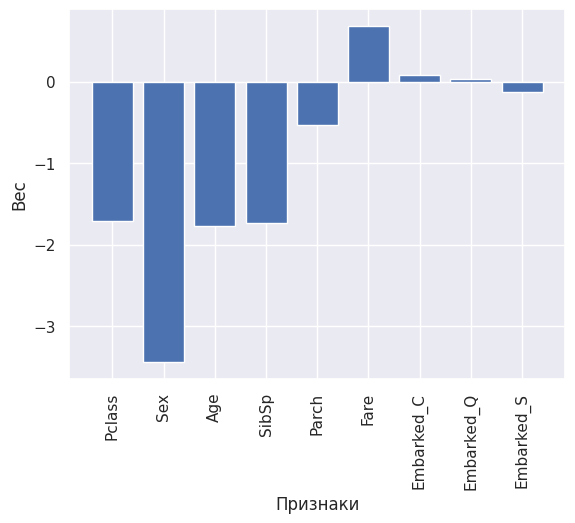

In [ ]:
plt.bar(range(len(weights)), weights, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.show()

In [ ]:
accuracy_score(y_test,pred_lr)
#Доля верных предсказаний на test
#! Эта метрика плохо работает с
#несбалансированными данными !
# = (141+83)/(141+12+26+83)

0.8549618320610687

<Axes: >

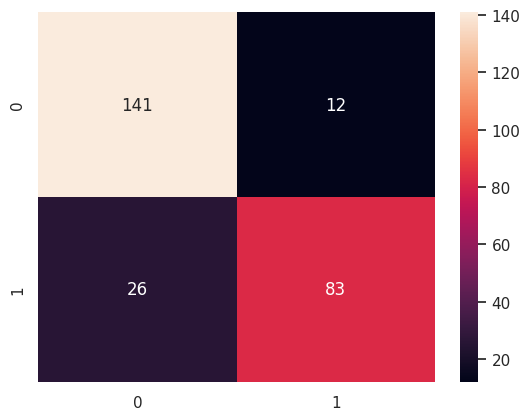

In [ ]:
cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True,fmt='.0f')
#Конфуций Матрица (шутка)
#слева predicted,снизу actual

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,pred_lr).ravel()
print(tn,fp,fn,tp)

141 12 26 83


In [ ]:
#precision - точность прогнозируемого положительного результата 83/(83+12)
#recall (охват модели ) - измеряет способность модели прогнозировать положительный результат 83/(83+26)
precision_score(y_test,pred_lr)

0.8736842105263158

In [ ]:
recall_score(y_test,pred_lr)

0.7614678899082569

In [ ]:
f1_score(y_test,pred_lr)
#гармоническое среднее между precision и recall

0.8137254901960783

In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       153
           1       0.87      0.76      0.81       109

    accuracy                           0.85       262
   macro avg       0.86      0.84      0.85       262
weighted avg       0.86      0.85      0.85       262



In [ ]:
lr.predict_proba(x_test)
#первый столбик - вероятность объекта быть 0 классаом
#второй столбик - вероятность объекта быть 1 классом

array([[0.1756885 , 0.8243115 ],
       [0.26993498, 0.73006502],
       [0.62125557, 0.37874443],
       [0.08452442, 0.91547558],
       [0.87722042, 0.12277958],
       [0.5889285 , 0.4110715 ],
       [0.17563835, 0.82436165],
       [0.89512642, 0.10487358],
       [0.86390956, 0.13609044],
       [0.52596917, 0.47403083],
       [0.16666236, 0.83333764],
       [0.11430391, 0.88569609],
       [0.32996281, 0.67003719],
       [0.20446919, 0.79553081],
       [0.5392228 , 0.4607772 ],
       [0.09219275, 0.90780725],
       [0.17586379, 0.82413621],
       [0.89018281, 0.10981719],
       [0.86212206, 0.13787794],
       [0.86943973, 0.13056027],
       [0.17571359, 0.82428641],
       [0.85947531, 0.14052469],
       [0.11002427, 0.88997573],
       [0.23593216, 0.76406784],
       [0.68424977, 0.31575023],
       [0.86943973, 0.13056027],
       [0.06111906, 0.93888094],
       [0.90885354, 0.09114646],
       [0.17911325, 0.82088675],
       [0.48542071, 0.51457929],
       [0.

In [ ]:
y_true_lr = lr.predict_proba(x_test)
log_loss(y_test,y_true_lr)
#Эта метрика оценки эффективности модели бинарной классификации.
#Чем ближе к 0 данная метрика, тем лучше

0.39079701805816014

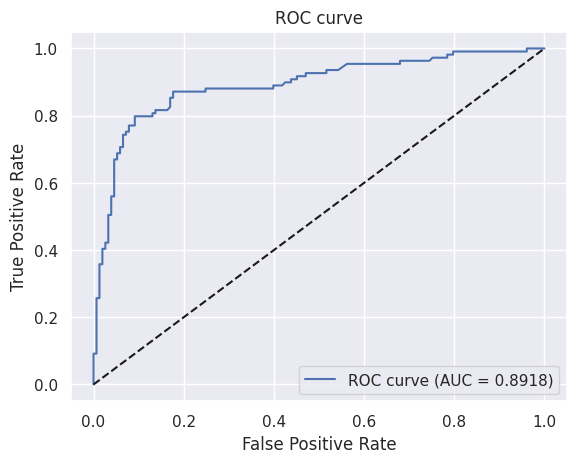

In [ ]:
probs_lr = lr.predict_proba(x_test)[:, 1]
#Строим ROC-кривую и считаем AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, probs_lr)
roc_auc = roc_auc_score(y_test, probs_lr)
# Строим Precision-Recall кривую
precision, recall, thresholds = precision_recall_curve(y_test, probs_lr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc,)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
#площадь под ROC-curve=0.8918 (1 - max value)

In [ ]:
#RFECV - Рекурсивное исключение признаков (RFE) с перекрестной проверкой (CV) для оценки их важности
#RFECV полезно использовать в случае несбалансированных данных
#Посмотрим на изменения качества модели, после применения RFECV
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=LogisticRegression(random_state=52), step=0.1, cv=5,scoring='f1')
rfecv.fit(x_train,y_train)

RFECV(cv=5, estimator=LogisticRegression(random_state=52), scoring='f1',
      step=0.1)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)
#выводим оптимальное число переменных
#при этом оптимальное число переменных для
#улучшения метрики roc-auc = 6

Optimal number of features : 3


In [ ]:
rfecv.support_

array([ True,  True, False,  True, False, False, False, False, False])

In [ ]:
list(np.array(rfecv.support_))

[True, True, False, True, False, False, False, False, False]

In [ ]:
x_train_rfecv = x_train.loc[:, list(np.array(rfecv.support_))]
x_test_rfecv = x_test.loc[:, list(np.array(rfecv.support_))]
#удаляем лишние признаки

In [ ]:
x_train_rfecv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 19 to 1013
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1047 non-null   float64
 1   Sex     1047 non-null   int64  
 2   SibSp   1047 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.7 KB


In [ ]:
lr_rfecv = LogisticRegression(random_state=52,max_iter=1000,class_weight='balanced')
lr_rfecv.fit(x_train_rfecv, y_train)
pred_lr_rfecv=lr_rfecv.predict(x_test_rfecv)

In [ ]:
weights_lr_rfecv = lr_rfecv.coef_[0]
feature_names_lr_rfecv = x_train_rfecv.columns
lr_rfecv_weights = pd.DataFrame({'Признаки': feature_names_lr_rfecv, 'Вес': weights_lr_rfecv})
lr_rfecv_weights

,Признаки,Вес
0,Pclass,-1.553971
1,Sex,-3.467961
2,SibSp,-1.492113


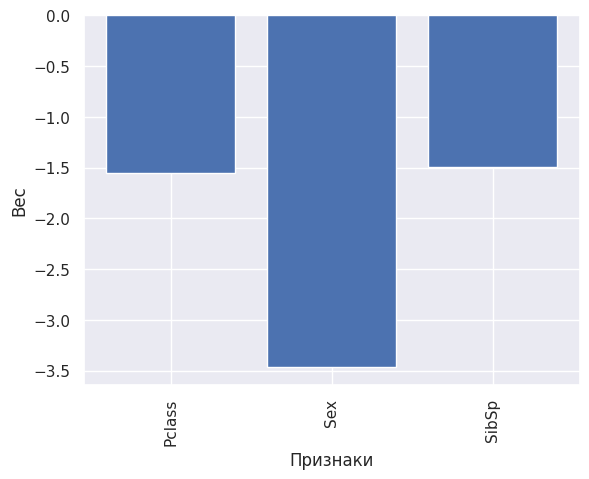

In [ ]:
plt.bar(range(len(weights_lr_rfecv)), weights_lr_rfecv, tick_label=feature_names_lr_rfecv)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.show()

In [ ]:
print(classification_report(y_test,pred_lr_rfecv))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       153
           1       0.88      0.76      0.82       109

    accuracy                           0.86       262
   macro avg       0.86      0.84      0.85       262
weighted avg       0.86      0.86      0.86       262



In [ ]:
f1_score(y_test,pred_lr_rfecv)
#данная метрика увеличилась на 0,004

0.8177339901477833

In [ ]:
y_true_lr_rfecv = lr_rfecv.predict_proba(x_test_rfecv)
log_loss(y_test,y_true_lr_rfecv)

0.395151088674981

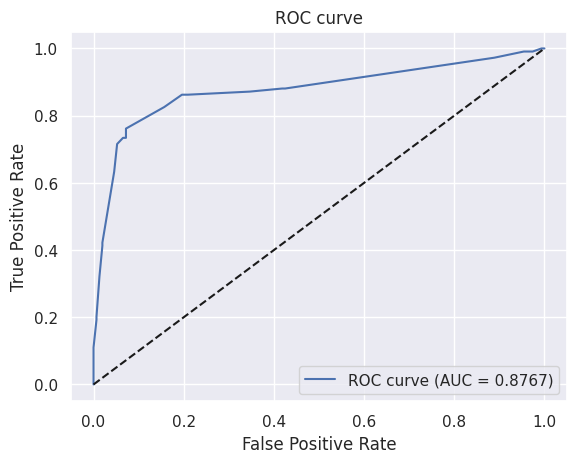

In [ ]:
probs_lr_rfecv = lr_rfecv.predict_proba(x_test_rfecv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs_lr_rfecv)
roc_auc = roc_auc_score(y_test, probs_lr_rfecv)
precision, recall, thresholds = precision_recall_curve(y_test, probs_lr_rfecv)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
#площадь под ROC-curve=0.8910 (1 - max value)

#Да,метрика f1 выросла на 0,04 ,но метрика roc-auc снизилась
#на 0,0151. Также был удален признак 'Age', что был выделен
#при EDA

In [ ]:
#Обучим дерево решений для решение задачи классификации
from sklearn.tree import DecisionTreeClassifier

#Найдем лучшие гиперпараметры для модели
from sklearn.model_selection import RandomizedSearchCV

#tre=DecisionTreeClassifier(random_state=52)
#param_dist = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': np.arange(1, 31),
#    'min_samples_split': np.arange(2, 31),
#    'min_samples_leaf': np.arange(1, 11),
#    'class_weight': ['balanced',None] }

#random_search_tre= RandomizedSearchCV(tre, param_distributions=param_dist, n_iter=1000, cv=5, scoring='roc_auc', random_state=52)
#random_search_tre.fit(x_train,y_train)
#best_params = random_search_tre.best_params_
#print("Лучшие параметры:", best_params)

In [ ]:
#Лучшие параметры: {'min_samples_split': 13, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'gini'} - без балансировки классов для максимизации f1
#Лучшие параметры: {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini', 'class_weight': 'balanced'} - для максимизации f1
tre = DecisionTreeClassifier(random_state=52,criterion='gini',min_samples_split=8, min_samples_leaf=2,max_depth=3,class_weight='balanced')
tre.fit(x_train,y_train)
pred_tre = tre.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


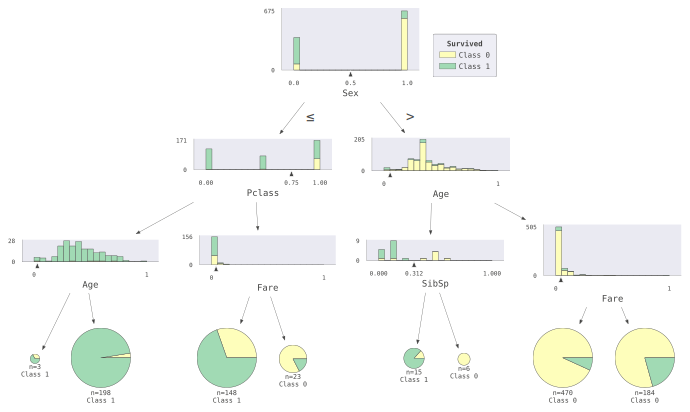

In [ ]:
#Визуализируем дерево решений
!pip install -q dtreeviz
import dtreeviz
from dtreeviz.trees import *
viz_model = dtreeviz.model(model=tre, X_train=x_train,y_train=y_train,target_name='Survived',
                           feature_names=x_train.columns)
viz_model.view(fontname="monospace")

In [ ]:
# Визуализируем значимость признаков в модели

importances = tre.feature_importances_
feature_names = x_train.columns
tre_importances= pd.DataFrame({'Признаки': feature_names, 'Вес': importances})
tre_importances.set_index('Вес')
tre_importances = tre_importances.sort_values('Вес')
tre_importances

,Признаки,Вес
4,Parch,0.000000
6,Embarked_C,0.000000
7,Embarked_Q,0.000000
8,Embarked_S,0.000000
3,SibSp,0.021515
0,Pclass,0.044069
2,Age,0.050403
5,Fare,0.065377
1,Sex,0.818636


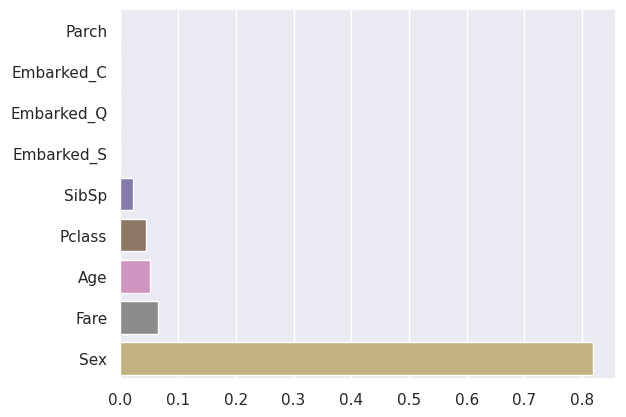

In [ ]:
sns.barplot(x='Вес', y='Признаки', data=tre_importances)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

In [ ]:
print(classification_report(y_test,pred_tre))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       153
           1       0.90      0.73      0.81       109

    accuracy                           0.85       262
   macro avg       0.87      0.84      0.85       262
weighted avg       0.86      0.85      0.85       262



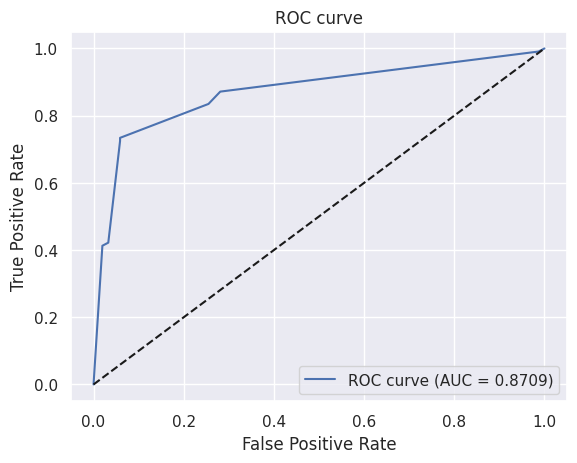

In [ ]:
probs_tre = tre.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs_tre)
roc_auc = roc_auc_score(y_test, probs_tre)
precision, recall, thresholds = precision_recall_curve(y_test, probs_tre)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
#Получившиеся метрики для дерева решений
#имеют примерно такие же значения, что и
#для логарифмической регрессии. Попробуем
#улучшить данную модель, ...

In [ ]:
# ... постров лес решений
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Аналогично подберем лучшие гиперпараметры для модели с помощью RandomizedSearchCV

#param_dist = {
#    'n_estimators': np.arange(10, 200, 10),
#    'max_depth':(np.arange(2, 31)),
#    'min_samples_split': np.arange(2, 21),
#    'min_samples_leaf': np.arange(1, 11),
#    'max_features': ['auto', 'sqrt', 'log2', None],
#    'bootstrap': [True, False],
#    'class_weight': [None, 'balanced', 'balanced_subsample']}
#rf = RandomForestClassifier(random_state=52)
#random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, random_state=52, n_jobs=-1, scoring='f1', cv=5)
#random_search_rf.fit(x_train, y_train)
#best_params = random_search_rf.best_params_
#print("Лучшие параметры:", best_params)

In [ ]:
#Лучшие параметры: {'n_estimators': 110, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 19, 'class_weight': 'balanced', 'bootstrap': False}
#Лучшие параметры: {'n_estimators': 120, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': False}
#Во втором вариаете я увеличил диапозон некоторых гиперпараметров
rf = RandomForestClassifier(n_estimators=120, min_samples_split= 18, min_samples_leaf= 5, max_features='sqrt',max_depth=20,
                            class_weight='balanced',bootstrap=False,random_state=52)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [ ]:
#Визуализируем значимость признаков
importances = rf.feature_importances_
feature_names = x_train.columns
rf_importances= pd.DataFrame({'Признаки': feature_names, 'Вес': importances})
rf_importances.set_index('Вес')
rf_importances = rf_importances.sort_values('Вес')
rf_importances

,Признаки,Вес
6,Embarked_C,0.005305
7,Embarked_Q,0.006344
8,Embarked_S,0.008572
4,Parch,0.025782
3,SibSp,0.033424
0,Pclass,0.059892
2,Age,0.089405
5,Fare,0.140133
1,Sex,0.631144


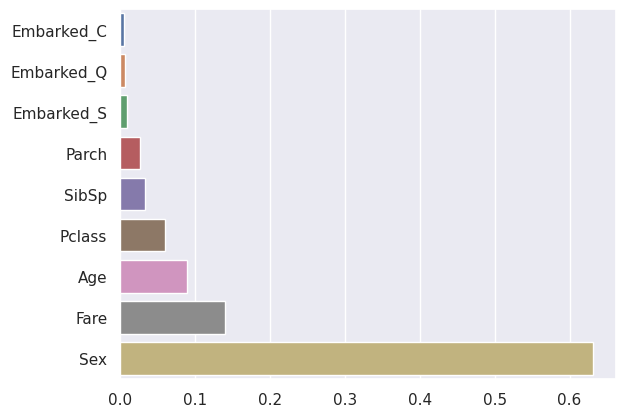

In [ ]:
sns.barplot(x='Вес', y='Признаки', data=rf_importances)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       153
           1       0.86      0.74      0.80       109

    accuracy                           0.84       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.85      0.84      0.84       262



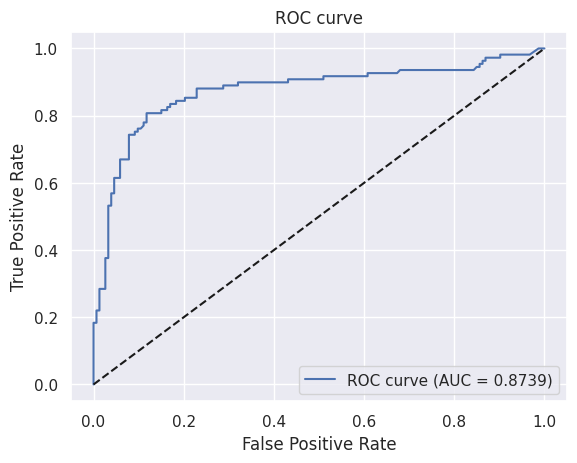

In [ ]:
probs_rf=rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
roc_auc=roc_auc_score(y_test, probs_rf)
precision, recall, thresholds = precision_recall_curve(y_test, probs_rf)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [ ]:
#Используем модели на основе градиентного бустинга
import xgboost as xgb
import lightgbm as lgb
!pip install catboost
import catboost
from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.experimental import enable_hist_gradient_boosting
# HistGradientBoostingClassifier - тоже хорошая модель, но
#больше подходит, когда размер выборки более 10 000

In [ ]:
# Найдем лучшие гиперпараметры для кажой модели

#param_dist_xgb={
#    'n_estimators': np.arange(100, 1000, 100),
#    'max_depth': np.arange(3, 10),
#    'learning_rate': [0.01, 0.1, 0.2, 0.3]}
#
#param_dist_lgb={
#    'n_estimators': np.arange(100, 1000, 100),
#    'max_depth': np.arange(3, 10),
#    'learning_rate': [0.01, 0.1, 0.2, 0.3]}
#
#param_dist_catboost={
#    'iterations': np.arange(100, 1000, 100),
#    'depth': np.arange(3, 10),
#    'learning_rate': [0.01, 0.1, 0.2, 0.3]}
#
#param_dist_gbc={
#    'n_estimators': np.arange(100, 1000, 100),
#    'max_depth': np.arange(3, 10),
#    'learning_rate': [0.01, 0.1, 0.2, 0.3]}
#
#xgb=xgb.XGBClassifier(random_state=52)
#lgb=lgb.LGBMClassifier(random_state=52)
#catboost=catboost.CatBoostClassifier(random_state=52)
#gbc=GradientBoostingClassifier(random_state=52)
#
#random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, cv=5, scoring='f1', n_iter=100,random_state=52)
#random_search_xgb.fit(x_train, y_train)
#
#random_search_lgb = RandomizedSearchCV(lgb, param_distributions=param_dist_lgb, cv=5, scoring='f1', n_iter=100,random_state=52)
#random_search_lgb.fit(x_train, y_train)
#
#random_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_dist_catboost, cv=5, scoring='f1',
#                                            n_iter=100,random_state=52)
#random_search_catboost.fit(x_train, y_train)
#
#random_search_gbc = RandomizedSearchCV(gbc, param_distributions=param_dist_gbc, cv=5, scoring='f1', n_iter=100,random_state=52)
#random_search_gbc.fit(x_train, y_train)
#
#print("Лучшие параметры для XGBoost:")
#print(random_search_xgb.best_params_)
#
#print("\nЛучшие параметры для LightGBM:")
#print(random_search_lgb.best_params_)
#
#print("\nЛучшие параметры для CatBoost:")
#print(random_search_catboost.best_params_)
#
#print("\nЛучшие параметры для GradientBoostingClassifier:")
#print(random_search_gbc.best_params_)

In [ ]:
#Лучшие параметры для XGBoost: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01}
#Лучшие параметры для LightGBM: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01}
#Лучшие параметры для CatBoost:{'learning_rate': 0.01, 'iterations': 700, 'depth': 3}
#Лучшие параметры для GradientBoostingClassifier:{'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01}

xgb=xgb.XGBClassifier(random_state=52, n_estimators=400, max_depth=3, learning_rate=0.01)
lgb=lgb.LGBMClassifier(random_state=52,n_estimators= 400, max_depth=3, learning_rate=0.01,verbose=-1)
catboost=catboost.CatBoostClassifier(random_state=52,learning_rate=0.01, iterations=700,depth=3,verbose=False)
gbc=GradientBoostingClassifier(random_state=52,n_estimators=400,max_depth=3, learning_rate=0.01)


In [ ]:
#Обучим кажду модель и выведем полученные метрики классификации
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
print(classification_report(y_test,pred_xgb))
probs_xgb = xgb.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test,probs_xgb))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       153
           1       0.90      0.73      0.81       109

    accuracy                           0.85       262
   macro avg       0.87      0.84      0.85       262
weighted avg       0.86      0.85      0.85       262

0.8834622534028902


In [ ]:
lgb.fit(x_train,y_train)
pred_lgb=lgb.predict(x_test)
print(classification_report(y_test,pred_lgb))
probs_lgb = lgb.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test,probs_lgb))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       153
           1       0.90      0.73      0.81       109

    accuracy                           0.85       262
   macro avg       0.87      0.84      0.85       262
weighted avg       0.86      0.85      0.85       262

0.8916471787491757


In [ ]:
catboost.fit(x_train,y_train)
pred_catboost=catboost.predict(x_test)
print(classification_report(y_test,pred_catboost))
probs_catboost = catboost.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test,probs_catboost))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       153
           1       0.88      0.72      0.79       109

    accuracy                           0.84       262
   macro avg       0.85      0.83      0.83       262
weighted avg       0.85      0.84      0.84       262

0.8786052647358639


In [ ]:
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(classification_report(y_test,pred_gbc))
probs_gbc = gbc.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test,probs_gbc))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       153
           1       0.90      0.73      0.81       109

    accuracy                           0.85       262
   macro avg       0.87      0.84      0.85       262
weighted avg       0.86      0.85      0.85       262

0.8872698926665468


**Выводы:**
*  Были обучены различные модели классификации и получены метрики на основе тестовой выборки
*  Поставленные задачи были выполненны, можно делать заключения по исследованию



#**Вывод**

In [ ]:
#Сделаем таблицу с моделями и из значениями по метрикам
accuracy = [accuracy_score(y_test, pred_lr), accuracy_score(y_test, pred_lr_rfecv), accuracy_score(y_test, pred_tre), accuracy_score(y_test, pred_rf),
                   accuracy_score(y_test, pred_xgb), accuracy_score(y_test, pred_lgb), accuracy_score(y_test, pred_catboost),accuracy_score(y_test, pred_gbc)]

f1 = [f1_score(y_test, pred_lr), f1_score(y_test, pred_lr_rfecv), f1_score(y_test, pred_tre), f1_score(y_test, pred_rf), f1_score(y_test, pred_xgb),
             f1_score(y_test, pred_lgb), f1_score(y_test, pred_catboost),f1_score(y_test, pred_gbc)]

roc_auc = [roc_auc_score(y_test, probs_lr),roc_auc_score(y_test, probs_lr_rfecv),roc_auc_score(y_test, probs_tre),roc_auc_score(y_test, probs_rf),
           roc_auc_score(y_test, probs_xgb),roc_auc_score(y_test, probs_lgb),roc_auc_score(y_test, probs_catboost),roc_auc_score(y_test, probs_gbc)]

itog=pd.DataFrame({'Модель': ['Logistic regression', 'Logistic regression with RFECV', 'Decision ree', 'Random forest', 'XGBoost', 'LightGBM', 'CatBoost', 'Gradient Boosting'],
                   'Accuracy': accuracy ,'F1': f1 ,'Roc Auc': roc_auc })
itog = itog.set_index("Модель")
itog

,Accuracy,F1,Roc Auc
Модель,,,
Logistic regression,0.854962,0.813725,0.891797
Logistic regression with RFECV,0.858779,0.817734,0.876746
Decision ree,0.854962,0.808081,0.870930
Random forest,0.843511,0.798030,0.873928
XGBoost,0.854962,0.808081,0.883462
LightGBM,0.854962,0.808081,0.891647
CatBoost,0.843511,0.793970,0.878605
Gradient Boosting,0.854962,0.808081,0.887270


**Итог:**
*   Исследование успешно завершено, и его цель была полностью достигнута. В ходе выполнения проекта были выполнены все этапы решения задачи.
*   Модель логистической регрессии выделяется среди  остальных как лучшая. Она достигла наивысшего значения метрики ROC AUC, хотя в метриках Accuracy и F1 она заняла второе место. Помимо этого логистическая регрессия имеет несколько преимуществ по сравнению с другими моделями:
1.   Простота интерпретации
2.   Меньше склонна к переобучению
3.   Высокая скорость выполнения
4.   Демонстрирует хорошие показатели даже без необходимости подбора гиперпараметров методом RandomizedSearchCV


